In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("extract_branch_1.csv", sep="|")
df2 = pd.read_csv("extract_branch_2.csv", sep="|")
df3 = pd.read_csv("extract_branch_3.csv", sep="|")
df4 = pd.read_csv("extract_branch_4.csv", sep="|")
df5 = pd.read_csv("extract_branch_5.csv", sep="|")
df6 = pd.read_csv("extract_branch_6.csv", sep="|")
df7 = pd.read_csv("extract_branch_7.csv", sep="|")
df8 = pd.read_csv("extract_branch_8.csv", sep="|")
df9 = pd.read_csv("extract_branch_9.csv", sep="|")
df10 = pd.read_csv("extract_branch_10.csv", sep="|")
df_final = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=0)

In [3]:
df_final.to_csv('Datos_final.csv',index=False)

In [4]:
df_final

muon_pt0   muon_pt1  muon_eta0  muon_eta1  muon_phi0  muon_phi1  \
0      52.015920  27.629519  -1.580862  -2.364866  -2.501061   1.454662   
1      20.988306        NaN  -1.762789        NaN   0.681954        NaN   
2      49.694206  45.952580   0.479537   0.319859  -1.291727   1.703360   
3      43.154423  11.767274   0.521952  -2.139418  -2.654244   0.666879   
4      20.185170        NaN  -0.737512        NaN   1.836480        NaN   
...          ...        ...        ...        ...        ...        ...   
49995  54.515488  38.560146   0.450182  -0.065463  -1.605017   2.188799   
49996  51.486023  42.358368  -2.387005  -2.250469   0.496252  -2.888055   
49997  66.348816  29.576609   1.228351   0.633690   1.557679  -2.025799   
49998  38.425420  21.532639  -0.401638   1.768425  -1.924342   1.157258   
49999  42.300660  38.482430   0.585719  -0.558748   1.446320  -1.480521   

       muon_charge0  muon_charge1  muon_size  
0              -1.0           1.0          2  
1              -1.0           NaN          1  
2               1.0          -1.0          2  
3               1.0          -1.0          2  
4              -1.0           NaN          1  
...             ...           ...        ...  
49995           1.0          -1.0          2  
49996           1.0          -1.0          2  
49997           1.0          -1.0          2  
49998          -1.0           1.0          2  
49999          -1.0           1.0          2  

[500000 rows x 9 columns]

In [5]:
df1=df_final.query("muon_pt0 > 30 & muon_pt1 > 30 & abs(muon_eta0)< 2.1 & abs(muon_eta1)< 2.1\
                  & muon_charge0*muon_charge1==-1.0 & muon_size ==2")
df1
#df1.head(100)

muon_pt0   muon_pt1  muon_eta0  muon_eta1  muon_phi0  muon_phi1  \
2      49.694206  45.952580   0.479537   0.319859  -1.291727   1.703360   
9      33.306570  32.984680   0.183377   1.870132  -0.016265   2.956525   
10     36.868160  35.352776  -0.409119  -1.620722   1.653552  -1.457202   
11     42.936005  36.968166   1.077988   0.027166  -0.154561   3.091244   
16     47.867460  44.715145  -0.715677  -0.478927  -1.751500   1.485987   
...          ...        ...        ...        ...        ...        ...   
49982  37.445724  36.792492   0.080485   1.083141   0.735180  -2.414907   
49983  44.588627  40.897076  -0.561488   0.212070  -1.746890   1.517763   
49993  54.799313  32.594210  -0.642293   0.255685  -0.670770   2.086907   
49995  54.515488  38.560146   0.450182  -0.065463  -1.605017   2.188799   
49999  42.300660  38.482430   0.585719  -0.558748   1.446320  -1.480521   

       muon_charge0  muon_charge1  muon_size  
2               1.0          -1.0          2  
9              -1.0           1.0          2  
10              1.0          -1.0          2  
11              1.0          -1.0          2  
16              1.0          -1.0          2  
...             ...           ...        ...  
49982          -1.0           1.0          2  
49983           1.0          -1.0          2  
49993          -1.0           1.0          2  
49995           1.0          -1.0          2  
49999          -1.0           1.0          2  

[220180 rows x 9 columns]

In [6]:
def invariant_mass(df):
    m= np.sqrt(2*df["muon_pt0"]*df["muon_pt1"]*(np.cosh(df["muon_eta0"]-df["muon_eta1"])-\
                                                    np.cos(df["muon_phi0"]-df["muon_phi1"])))
    return m

In [7]:
df1["Invariant_mass"]=df1.apply(invariant_mass,axis=1)

/home/melissa/Descargas/proyecto_de_computacional/dataframe/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df1

muon_pt0   muon_pt1  muon_eta0  muon_eta1  muon_phi0  muon_phi1  \
2      49.694206  45.952580   0.479537   0.319859  -1.291727   1.703360   
9      33.306570  32.984680   0.183377   1.870132  -0.016265   2.956525   
10     36.868160  35.352776  -0.409119  -1.620722   1.653552  -1.457202   
11     42.936005  36.968166   1.077988   0.027166  -0.154561   3.091244   
16     47.867460  44.715145  -0.715677  -0.478927  -1.751500   1.485987   
...          ...        ...        ...        ...        ...        ...   
49982  37.445724  36.792492   0.080485   1.083141   0.735180  -2.414907   
49983  44.588627  40.897076  -0.561488   0.212070  -1.746890   1.517763   
49993  54.799313  32.594210  -0.642293   0.255685  -0.670770   2.086907   
49995  54.515488  38.560146   0.450182  -0.065463  -1.605017   2.188799   
49999  42.300660  38.482430   0.585719  -0.558748   1.446320  -1.480521   

       muon_charge0  muon_charge1  muon_size  Invariant_mass  
2               1.0          -1.0          2       95.622849  
9              -1.0           1.0          2       91.125976  
10              1.0          -1.0          2       85.857471  
11              1.0          -1.0          2       90.839838  
16              1.0          -1.0          2       93.072373  
...             ...           ...        ...             ...  
49982          -1.0           1.0          2       83.760557  
49983           1.0          -1.0          2       91.724059  
49993          -1.0           1.0          2       91.783555  
49995           1.0          -1.0          2       90.094109  
49999          -1.0           1.0          2       93.871272  

[220180 rows x 10 columns]

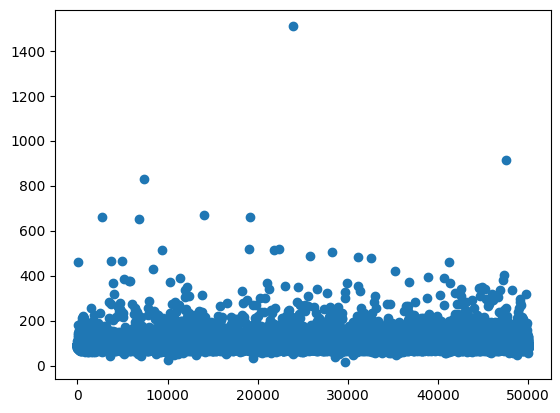

In [12]:
plt.plot(df1["Invariant_mass"],"o")

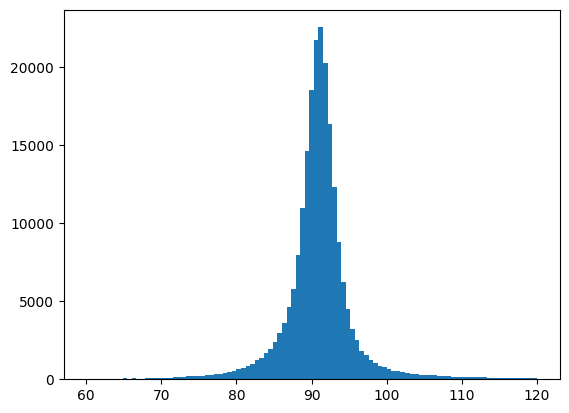

In [116]:
rango=np.linspace(60,120,100)
n, bins, patches=plt.hist(df1["Invariant_mass"],bins=rango);

In [11]:
mean_value=df1["Invariant_mass"].mean()
des_value=df1["Invariant_mass"].std()
print(mean_value,des_value)

91.56204800187602 10.507223614207744


In [94]:
bins_new=bins[1:100]

In [110]:
bins_new=[]
for i  in range(len(bins)-1):
    bins_new.append((bins[i] + bins[i+1])/2)

In [111]:
from scipy.optimize import minimize

In [112]:
def gauss(x,param):
    return param[0]*np.exp(-(x-param[1])**2/(2*param[2]**2))

In [113]:
def chi2_gauss(param):
    return np.sum(np.square(n-gauss(bins_new,param)))

In [114]:
result_gauss=minimize(chi2_gauss,(0,100,10))
result_gauss

      fun: 0.0026040189819315418
 hess_inv: array([[ 0.13414302,  0.04490455, -1.48700168],
       [ 0.04490455, 31.0786736 , -0.39872914],
       [-1.48700168, -0.39872914, 40.80145509]])
      jac: array([4.49770596e-07, 3.70200723e-08, 3.60305421e-08])
  message: 'Optimization terminated successfully.'
     nfev: 140
      nit: 28
     njev: 35
   status: 0
  success: True
        x: array([ 0.1587566 , 91.00564125,  2.14859436])

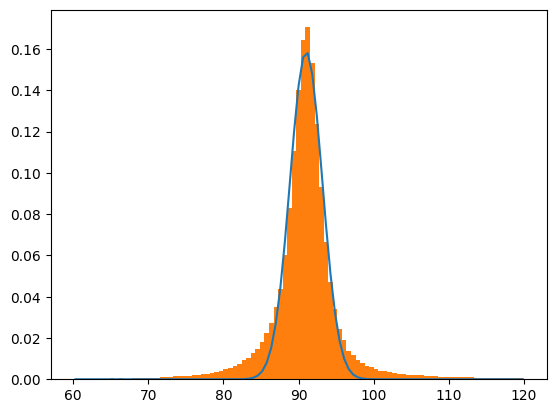

In [115]:
plt.plot(bins_new,gauss(bins_new,result_gauss.x),label="ajuste")
plt.hist(df1["Invariant_mass"],bins=rango,density=True);